# Code to download the Infrared Brightness temperetaure fields (IRWIN_CDR) from the GridSat database from NOAA


- illustrates the use of netcdf and xarray to download
- uses matplotlib with cartopy to plot the field



In [1]:
#import netCDF4
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from datetime import date
import pandas as pd
import os


In [2]:
urlBase = "https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/"  


2008-08-01 00:00:00
https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.01.12.v02r01.nc


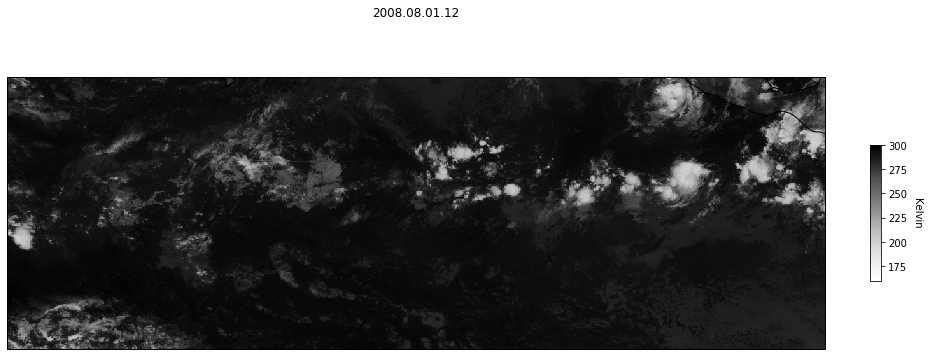

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.02.00.v02r01.nc


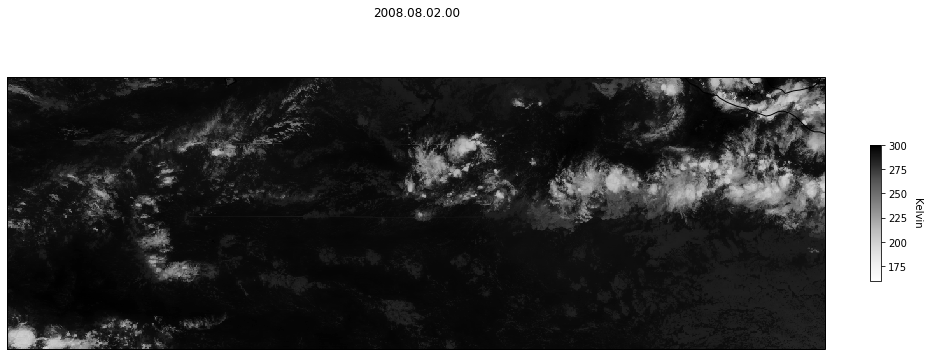

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.02.12.v02r01.nc


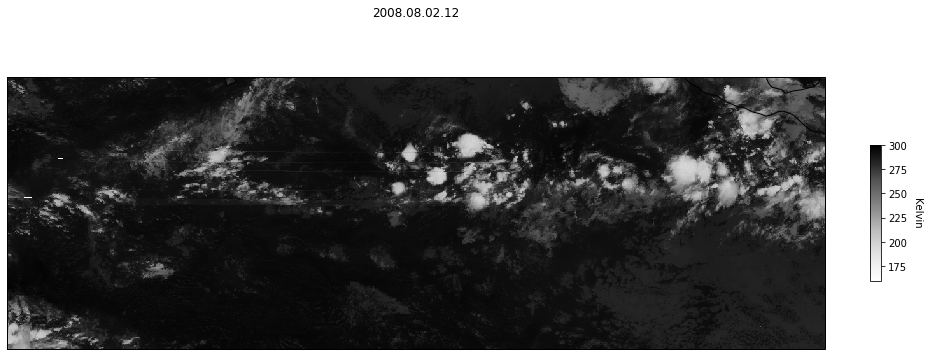

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.03.00.v02r01.nc


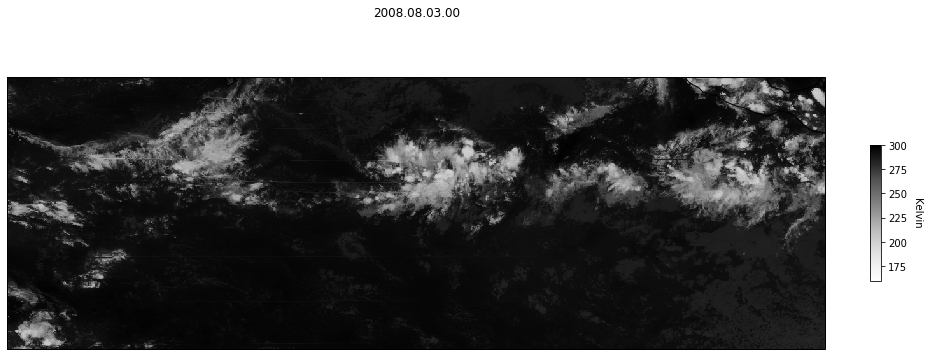

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.03.12.v02r01.nc


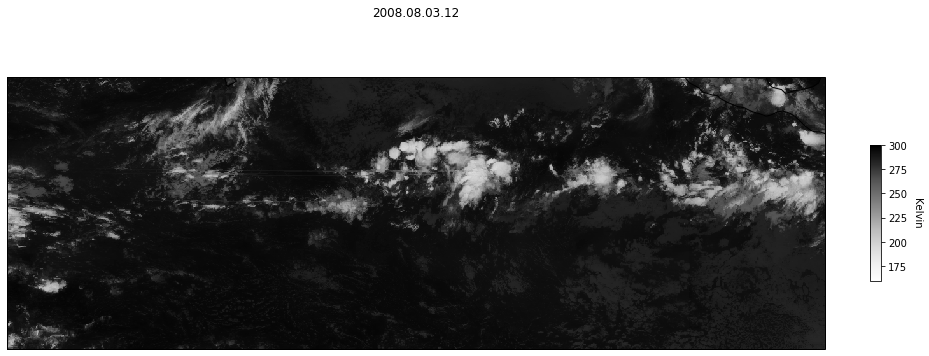

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.04.00.v02r01.nc


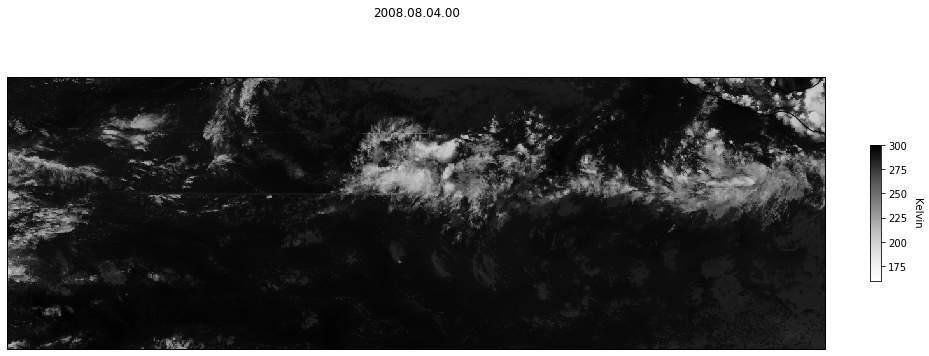

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.04.12.v02r01.nc


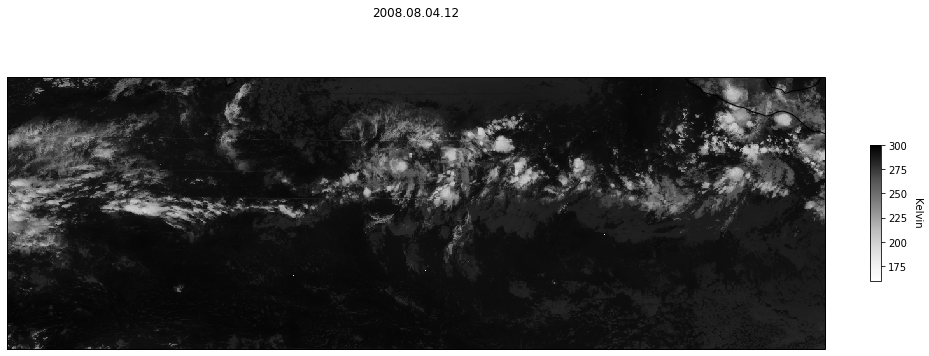

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.05.00.v02r01.nc


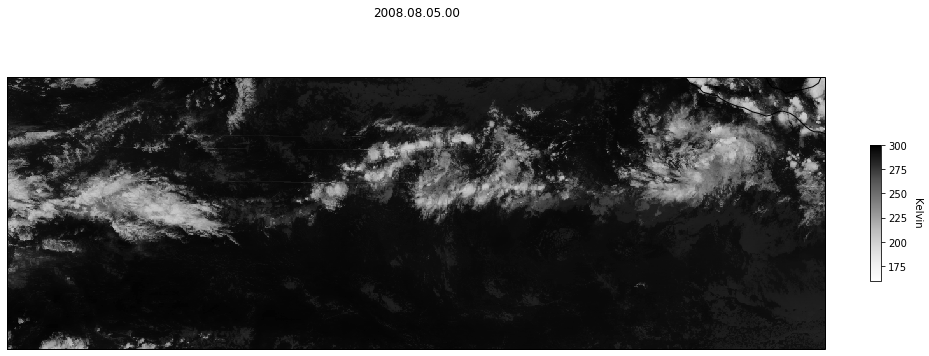

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.05.12.v02r01.nc


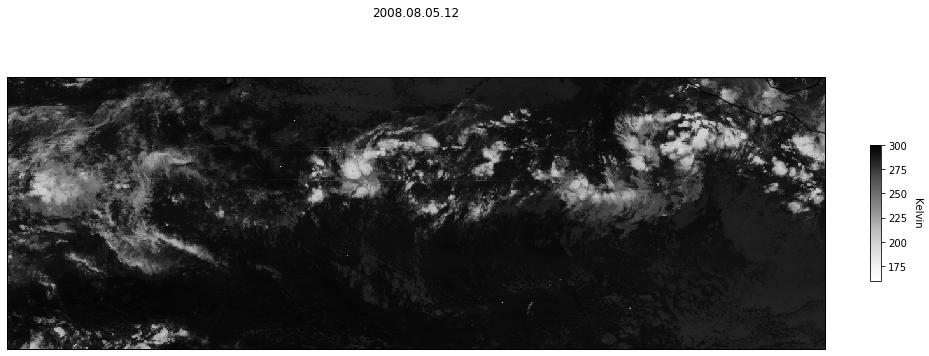

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.06.00.v02r01.nc


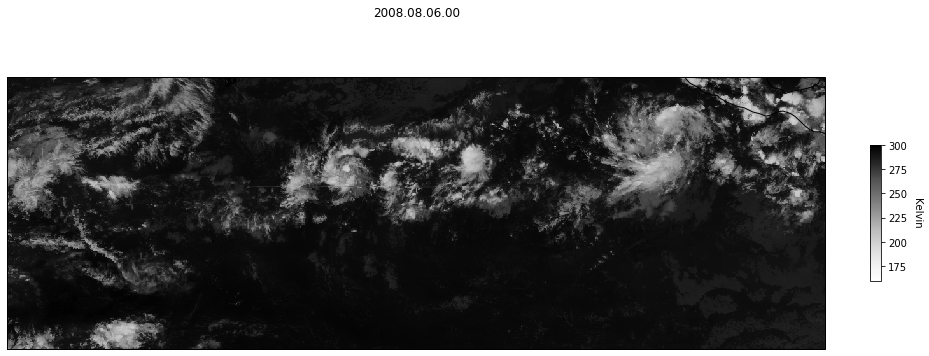

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.06.12.v02r01.nc


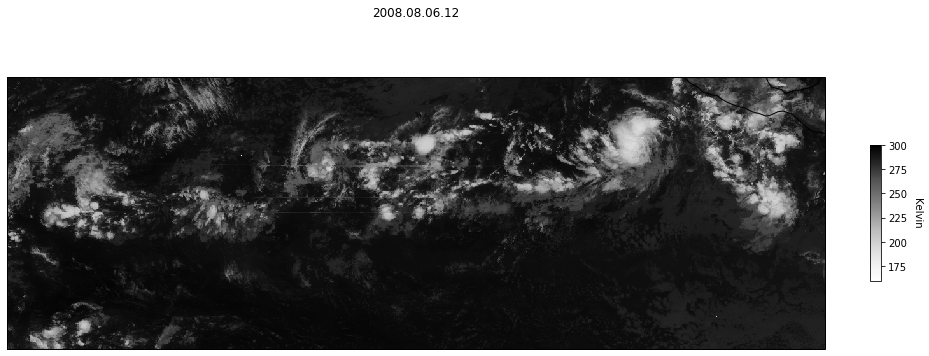

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.07.00.v02r01.nc


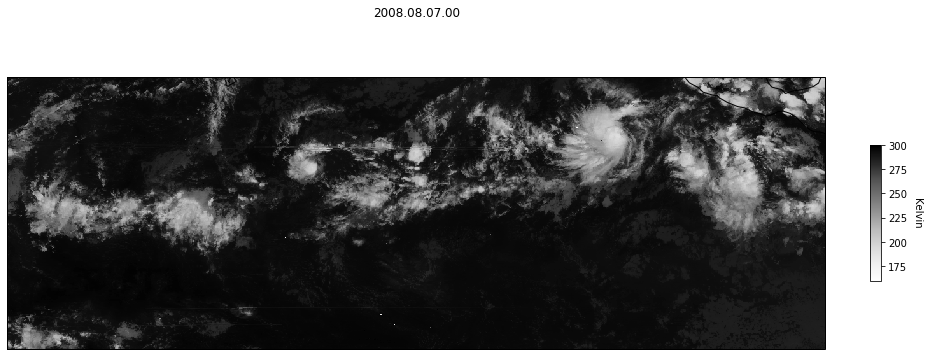

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.07.12.v02r01.nc


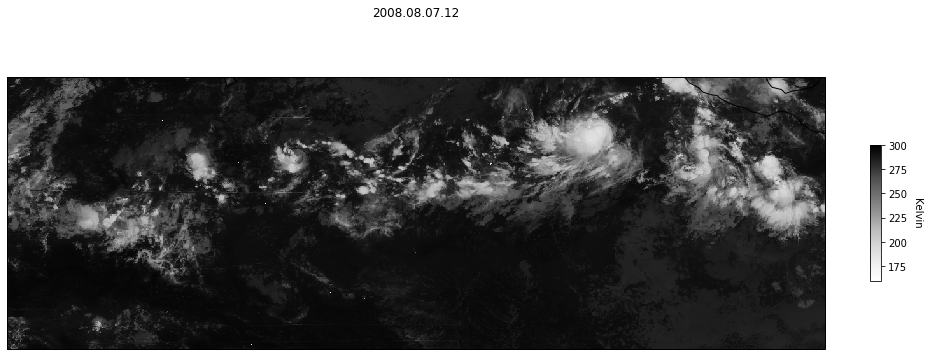

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.08.00.v02r01.nc


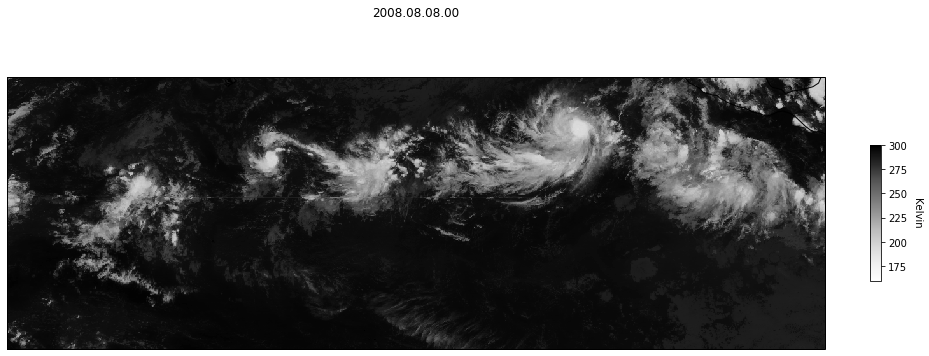

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.08.12.v02r01.nc


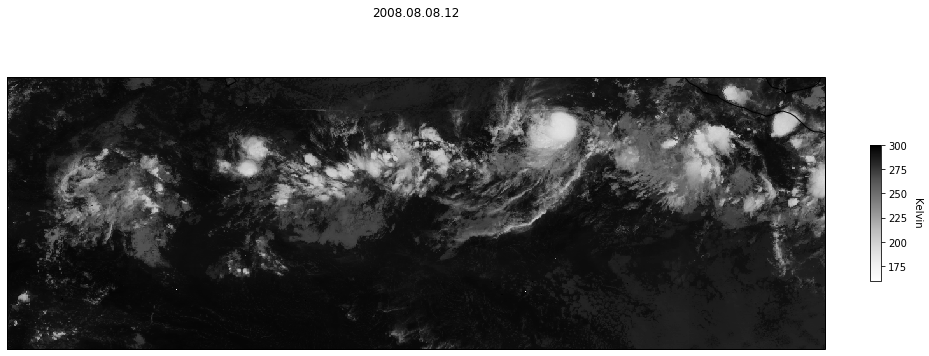

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.09.00.v02r01.nc


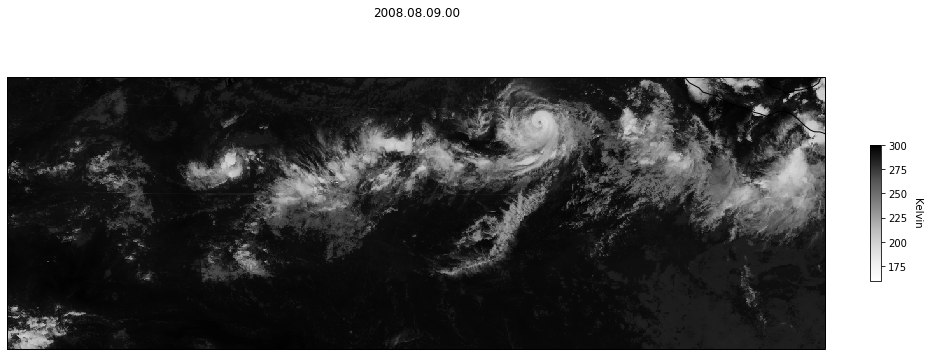

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.09.12.v02r01.nc


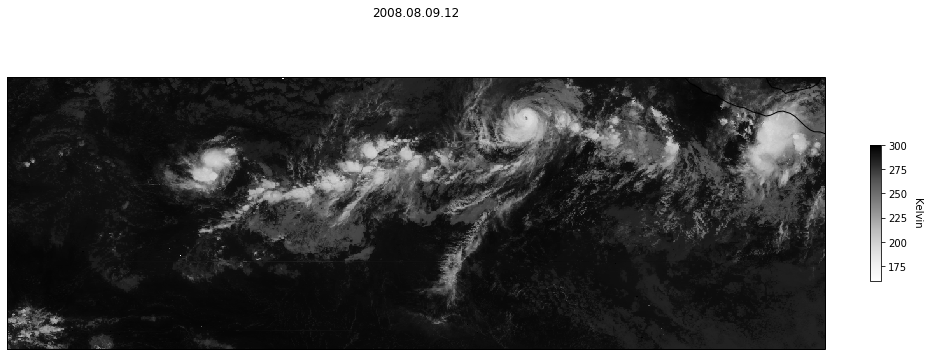

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.10.00.v02r01.nc


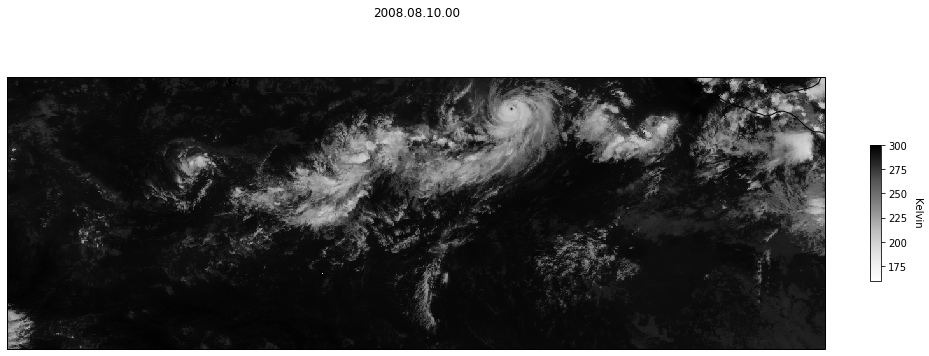

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.10.12.v02r01.nc


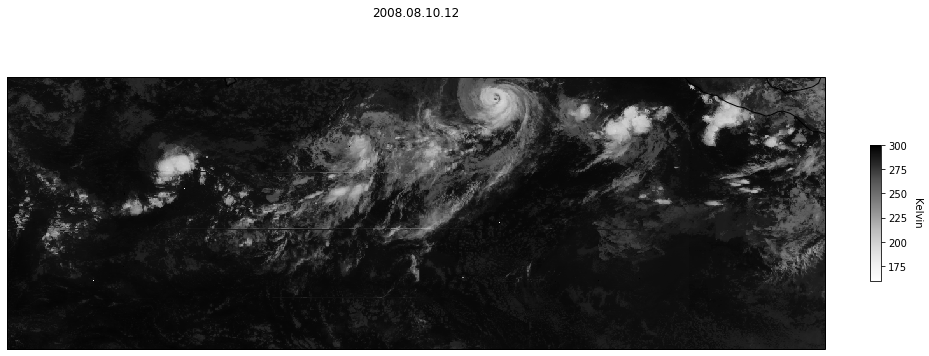

https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2008/GRIDSAT-B1.2008.08.11.00.v02r01.nc


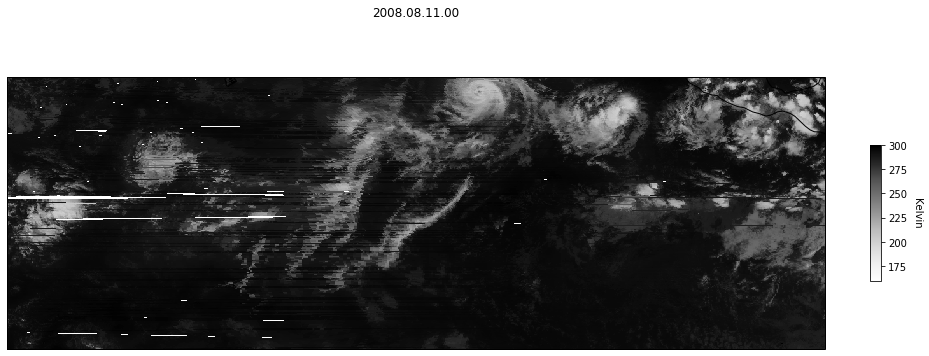

In [4]:

min_lon = -180.
max_lon = -90.
min_lat = -10.
max_lat =  20.


# set the min and max values to shade in the IR brightness temperature field
Cmin=  160
Cmax = 300



startDate = 2008080100

dateStart = pd.to_datetime(startDate, format='%Y%m%d%H')
print(dateStart)

ntimes = 60

for i in range(0, 20):
    dateStart = dateStart + pd.Timedelta("12 hours")
    dateString = dateStart.strftime('%Y.%m.%d.%H')
    url = urlBase +  str(dateStart.year) + "/GRIDSAT-B1."  +  dateString + ".v02r01.nc"

                                       
    print(url)
    
    df = xr.open_dataset(url)

    irwin = df.irwin_cdr[0,:,:]

    mask_lon = (irwin.lon >= min_lon) & (irwin.lon <= max_lon)
    mask_lat = (irwin.lat >= min_lat) & (irwin.lat <= max_lat)
    irwin = irwin.where(mask_lon & mask_lat, drop=True)
    

    lats = irwin['lat'][:]
    lons = irwin['lon'][:]
    fig = plt.figure(figsize=(20,5))  # set figsize (width, height) here
    # set up a map

    ax = plt.axes(projection=ccrs.PlateCarree())
    ct = plt.pcolormesh(lons, lats, irwin,cmap='Greys', rasterized=True, vmin=Cmin, vmax =Cmax)
    ax.coastlines()

    # create a colorbar
    cbar = plt.colorbar(ct, fraction=.08, pad=0.04, shrink=0.5, aspect=12)
    cbar.set_label('Kelvin', labelpad=15, y=.5, rotation=270)

    plt.title(dateString, y=1.2)
    plt.show()




url = "https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/2015/GRIDSAT-B1.2015.01.01.21.v02r01.nc"
#dataset = netCDF4.Dataset(url)

df = xr.open_dataset(url)

irwin = df.irwin_cdr[0,:,:]

min_lon = -180.
max_lon = -90.
min_lat = -10.
max_lat =  20.

mask_lon = (irwin.lon >= min_lon) & (irwin.lon <= max_lon)
mask_lat = (irwin.lat >= min_lat) & (irwin.lat <= max_lat)
irwin = irwin.where(mask_lon & mask_lat, drop=True)

print(irwin.lat)

print (irwin.min().values, irwin.max().values)


lats = irwin['lat'][:]
lons = irwin['lon'][:]



In [ ]:

#ax = plt.axes(projection=ccrs.PlateCarree())
#plt.contourf(lons, lats, irwin, 60,
#             transform=ccrs.PlateCarree())
#ax.coastlines()
#plt.show()

fig = plt.figure(figsize=(20,5))  # set figsize (width, height) here
# set up a map

Cmin=  160
Cmax = 300


ax = plt.axes(projection=ccrs.PlateCarree())
ct = plt.pcolormesh(lons, lats, irwin,cmap='Greys', rasterized=True, vmin=Cmin, vmax =Cmax)
ax.coastlines()

# create a colorbar
cbar = plt.colorbar(ct, fraction=.08, pad=0.04, shrink=0.5, aspect=12)
cbar.set_label('Kelvin', labelpad=15, y=.5, rotation=270)

plt.title(date, y=1.2)
plt.show()


# same plot as above but using contour - currentlt commented out as markdown

Cmin=  160
Cmax = 300


fig = plt.figure(figsize=(20,5))  # set figsize (width, height) here

# set up a map
ax = plt.axes(projection=ccrs.PlateCarree())
#ct = plt.pcolormesh(lons, lats, irwin,cmap='Greys', rasterized=True)

levels = np.linspace(Cmin,Cmax,21)


ct=plt.contourf(lons, lats, irwin,cmap='Greys', transform=ccrs.PlateCarree(), vmin=Cmin, vmax =Cmax,levels=levels)
ax.coastlines()

# create a colorbar
cbar = plt.colorbar(ct, fraction=.08, pad=0.04, shrink=0.5, aspect=12)
cbar.set_label('Kelvin', labelpad=15, y=.5, rotation=270)

plt.title(date, y=1.2)
plt.show()
